In [1]:
from hw1_code import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression

In [2]:
matplotlib.rcParams['figure.figsize'] = [15, 10]

# 1. Probability

Let $(X_1, X_2, \cdots, X_d)$ have a $d$-dimensional multivariate Gaussian distribution, with mean vector $\mu \in \rm I\!R^d$ and covariance matrix $\Sigma \in \rm I\!R^{d \times d}$, i.e. $(X_1, X_2, \cdots, X_d)\sim \cn (\mu, \Sigma)$. Use $\mu_i$ to denote the $i^{th}$ element of $\mu$ and $\Sigma_{ij}$ to denote the element at the $i^{th}$ row and $j^{th}$ column of $\Sigma$.

 
\begin{enumerate}
\item Let $x, y \in \reals^d$ be two independent samples drawn from $\cn (\mu, \Sigma)$. Give expression for $\ex \|x\|_2^2$ and $\ex \|x-y\|_2^2$. Express your answer as a function of $\mu$ and $\Sigma$. $\|x\|_2$ represents the $\ell_2$-norm of vector $x$. Observe that
\begin{align*}
\ex \|x\|_2^2 &= \ex\bigg(\sum_{i=1}^{d} x_i^2\bigg),\\
 &= \sum_{i=1}^{d} \ex (x_i^2),\\
 &= \sum_{i=1}^{d} \big( \Sigma_{i,i} + \mu_i^2 \big).
\end{align*}
And that
\begin{align}
\ex \|x-y\|_2^2 &= \ex \bigg( \sum_{i=1}^{d} (x_i-y_i)^2 \bigg),\\
&= \sum_{i=1}^{d} \bigg( \ex(x_i)^2 - 2\ex(x_*y_i) + \ex(y_i)^2 \bigg),\\
&= \sum_{i=1}^{d} \bigg( \ex(x_i^2) - 2\ex(x_i^2) + \ex(x_i^2) \bigg),\\
&= 0.
\end{align}

\begin{align}
H←120 ​+​ \frac{​​30(R−G)​​}{Vmax−Vmin}  ​​, if V​max​​ = B
\end{align}

# 3. Linear Regression

In [4]:
def add_bias(X, b=1):
    n = X.shape[0]
    bias = b*np.ones((n,1))
    return np.hstack((bias, X))

In [5]:
df = pd.read_csv('data.csv')
X = df.drop('y', axis=1)
y = df.y

In [6]:
X = add_bias(X)

## 3.4 Batch Gradient Descent

In [6]:
batch_alphas = [0.5, 0.1, 0.05, 0.01, 0.005]
theta_hists = []
loss_hists = []
for alpha in batch_alphas:
    theta_hist, loss_hist = batch_grad_descent(X, y, alpha=alpha, num_step=1000, grad_check=False)
    theta_hists.append((theta_hist, alpha))
    loss_hists.append((loss_hist, alpha))

/home/cfizette/NYU/NYU-Data-Science/DS-1003/hw/hw1/hw1_code.py:55: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - y_pred))
/home/cfizette/NYU/NYU-Data-Science/DS-1003/hw/hw1/hw1_code.py:185: RuntimeWarning: invalid value encountered in subtract
  theta -= grad*alpha


### Question 2

Text(0, 0.5, 'Average Square Loss')

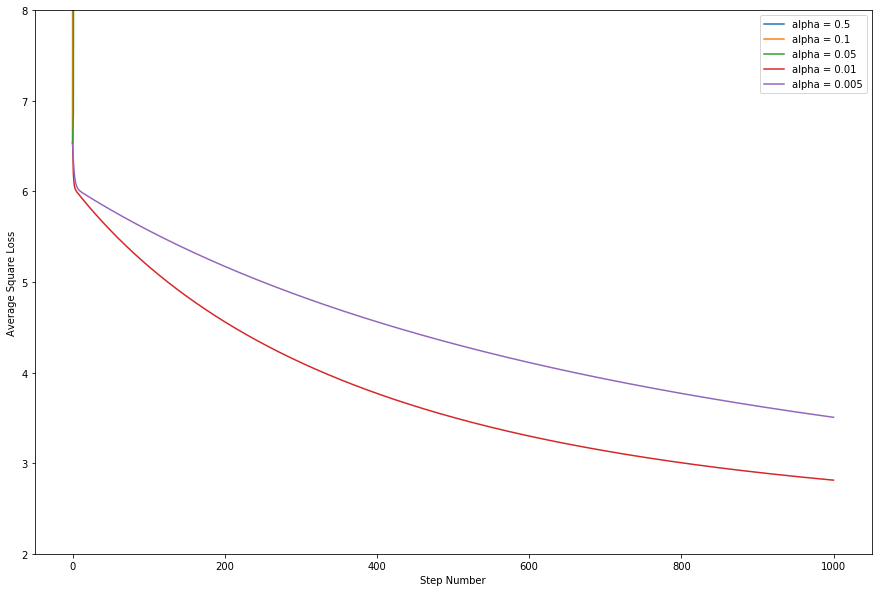

In [7]:
for loss_hist, alpha in loss_hists:
    plt.plot(loss_hist, label='alpha = {}'.format(alpha))
plt.ylim(2,8)
plt.legend()
plt.xlabel('Step Number')
plt.ylabel('Average Square Loss')

Step sizes above 0.01 resulted in divergence.

### Question 3

In [19]:
%timeit backtracking_line_search(X, y, c=0.01, b=0.5, num_step=1000)

5.43 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False)

/home/cfizette/NYU/NYU-Data-Science/DS-1003/hw/hw1/hw1_code.py:55: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - y_pred))
/home/cfizette/NYU/NYU-Data-Science/DS-1003/hw/hw1/hw1_code.py:185: RuntimeWarning: invalid value encountered in subtract
  theta -= grad*alpha


796 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
hist_backtrack, loss_hist_backtrack, alpha_hist = backtracking_line_search(X, y, max_alpha=5, c=0.01, b=0.5, num_step=1000)

In [8]:
theta_hist, loss_hist = batch_grad_descent(X, y, alpha=0.01, num_step=1000, grad_check=False)

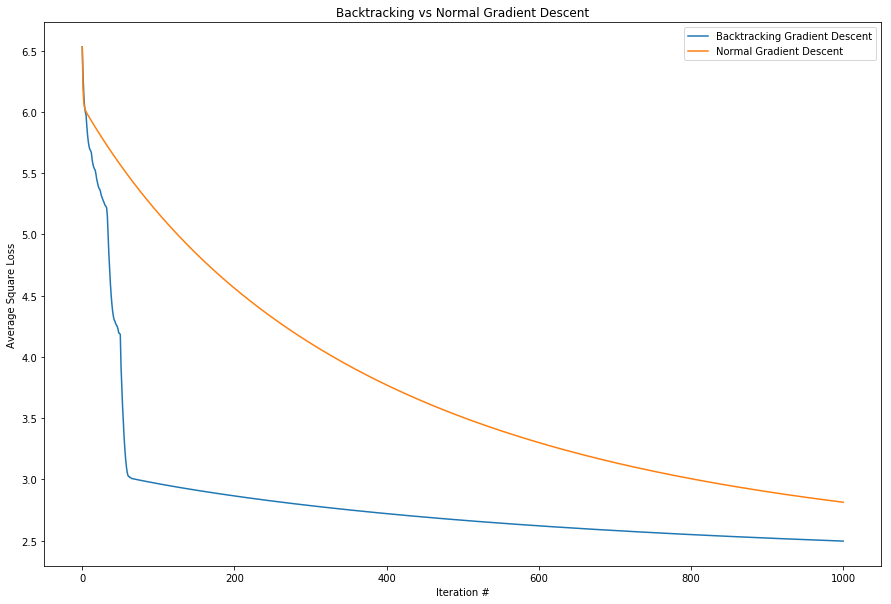

In [18]:
plt.plot(loss_hist_backtrack, label='Backtracking Gradient Descent')
plt.plot(loss_hist, label='Normal Gradient Descent')
plt.title("Backtracking vs Normal Gradient Descent")
plt.xlabel('Iteration #')
plt.ylabel('Average Square Loss')
plt.legend()

The backtracking algorithm is about 6x slower to run 1000 iterations. It is worth noting that the backtracking algorithm slows down as it approaches the optimal solution. This is due to the algorithm needing more iterations to shrink the step size to an appropriate level. However, in terms of iterations, the backtracking algorithm much faster. After 1000 iterations, the normal gradient descent algorithm performs about as well as the backtrackign algorithm does in 50 iterations. 